## 4.2 ANN & Deep Learning

### Perceptron(퍼셉트론)
1958년 Frank Rosenblatt(프랭크 로젠블랫)
생물학적 뇌의 뉴런을 모방하여 만든 인공신경망의 기본 단위
여러 입력을 값으로 받아 하나의 0 또는 1을 출력하는 함수
뇌의 신경세포 즉, 뉴런과 같은 역할
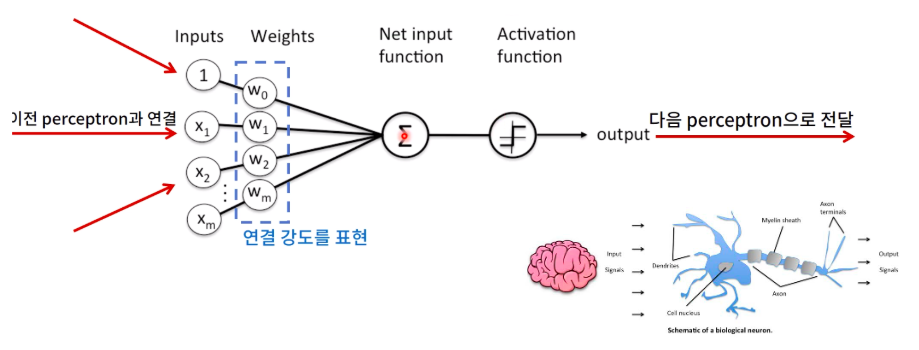

### Multi-Layer Perceptron
* Single-Layer Perceptron
    * 하나의 Perceptron 만을 이용
    * Logistic Regression
* Multi-Layer Perceptron
    * 여러개의 퍼셉트론 이용
    * Hidden-Layer
        * 정확한 상태를 알 수 없다.

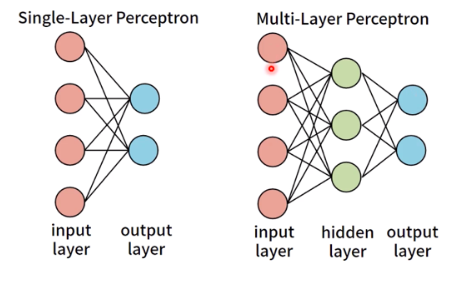

### Artificial Neural Network
* 인공 신경망
* Perceptron을 여러개 연결한 것

### Multi-Layer Perceptron의 필요성
* 비 선형 문제 
* 대표적 사례 : XOR 문제
* 고차원 다항식
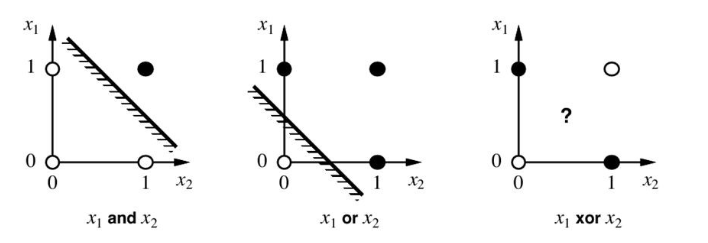

### Deep Learning
* Deep Neural Network를 이용한 Machine Learning
* Hidden-Layer가 2개 이상인 인공 신경망
* 1000개 이상인 경우 도 일반적

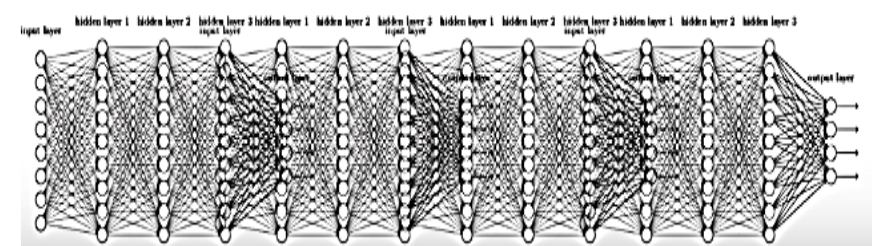

### 상수 값으로 풀어보는 XOR  예제
* 2개 층으로 구성된 NN으로 XOR 문제를 푸는 예시
* 단, W와 b를 이미 알고 있는 값을 지정해서 푼다.
* 이것이 가능하다면 여러 개층의 W와 b를 GD로 풀수 있으면 많은 문제를 딥러닝으로 해결이 가능하다는 말이다.
* 여기서 사용한 W와 b
![xor_nn_1](https://user-images.githubusercontent.com/661959/54298177-9e82f080-45fb-11e9-8bdd-1f86718c6f5d.png)
* $W$와 $bias$
    * Layer-1 y1: $W = \begin{bmatrix} 5 \\5 \end{bmatrix} , b= -8$
    * Layer-1 y2: $W = \begin{bmatrix}-7 \\ -7 \end{bmatrix} , b= 3$
    * Layer-2 : $W= \begin{bmatrix}-11 \\ -11 \end{bmatrix}, b = 6$
* 연산식
    * $x=(0,0)$
        * $ \begin{bmatrix}0 &0\ \end{bmatrix} \begin{bmatrix}5\\5\end{bmatrix}-8 = -8, sig(-8)=0$
        * $ \begin{bmatrix}0 &0\ \end{bmatrix} \begin{bmatrix}-7\\-7\end{bmatrix}+3 = 3, sig(3)=1$
            * $ \begin{bmatrix}0 &1\ \end{bmatrix} \begin{bmatrix}-11\\-11\end{bmatrix}+6 =-11+6= -5, sig(-5)=0$
    * $x=(0,1)$
        * $ \begin{bmatrix}0 &1\ \end{bmatrix} \begin{bmatrix}5\\5\end{bmatrix}-8 =5 -8=-3, sig(-3)=0$
        * $ \begin{bmatrix}0 &1\ \end{bmatrix} \begin{bmatrix}-7\\-7\end{bmatrix}+3 = -7+3, sig(-4)=0$
            * $ \begin{bmatrix}0 &0\ \end{bmatrix} \begin{bmatrix}-11\\-11\end{bmatrix}+6 =6, sig(6)=1$
    * $x=(1,0)$
        * $ \begin{bmatrix}1 &0\ \end{bmatrix} \begin{bmatrix}5\\5\end{bmatrix}-8 =5 -8=-3, sig(-3)=0$
        * $ \begin{bmatrix}1 &0\ \end{bmatrix} \begin{bmatrix}-7\\-7\end{bmatrix}+3 = -7+3, sig(-4)=0$
            * $ \begin{bmatrix}0 &0\ \end{bmatrix} \begin{bmatrix}-11\\-11\end{bmatrix}+6 =6, sig(6)=1$
    * $x=(1,1)$
        * $ \begin{bmatrix}1 &1\ \end{bmatrix} \begin{bmatrix}5\\5\end{bmatrix}-8 =5+5-8=2, sig(2)=1$
        * $ \begin{bmatrix}1 &1\ \end{bmatrix} \begin{bmatrix}-7\\-7\end{bmatrix}+3 = -7-7+3=-11, sig(-11)=0$
            * $ \begin{bmatrix}1 &0\ \end{bmatrix} \begin{bmatrix}-11\\-11\end{bmatrix}+6 =-11+6= -5, sig(-5)=0$
* 연산 결과

| $x_1$ $x_2$ | $y_1$ $y_2$ | $\hat y$|
|---|---|---|
|0,0|0,1|0
|0,1|0,0|1
|1,0|0,0|1
|1,1|1,0|0



#### Tensorflow를 이용한 XOR 문제 예제

### XOR 문제 Multi-variable 형식으로 축소
![xor_nn_2](https://user-images.githubusercontent.com/661959/54298185-a347a480-45fb-11e9-91d4-e98111241794.png)

* $W$와 bias
    * $x = \begin {bmatrix}0 & 0\\ 0&1\\1&0\\1&1 \end {bmatrix}$
    * $W_1 = \begin{bmatrix}5&-7 \\ 5&-7\end{bmatrix}$
    * $b_1 = \begin{bmatrix}-8 & 3 \end{bmatrix}$
    * $W_2 = \begin{bmatrix}-11 \\ -11\end{bmatrix}$
    * $b_2 = 6 $
* 연산식
    * $ \hat y =
  \begin{cases}
    K(x) = sigmoid(Xw_1 + b_1)\\
    H(x) = sigmoid(K(x)W_2 + b_2)
  \end{cases}
    $

In [2]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(np.array([[5,-7], [5,-7]], dtype=np.float32), name='weight1')
b1 = tf.Variable(np.array([[-8, 3]], dtype=np.float32), name='bias1')
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(np.array([[-11],[-11]], dtype=np.float32), name='weight2')
b2 = tf.Variable(np.array([6], dtype=np.float32), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)


# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
   # print(sess.run(hypothesis , feed_dict={X: x_data, Y: y_data}))
    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")


Hypothesis:
[[0.01118419]
 [0.9949357 ]
 [0.9949357 ]
 [0.02438849]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


### Backpropagation
* 역 전파 알고리즘
* 출력층의 결과 오차를 입력층 까지 거슬러 전파하면서 계산
* 미분 연산
    * ReLu 활성화 함수  
    * Sigmoid 미분 불가능
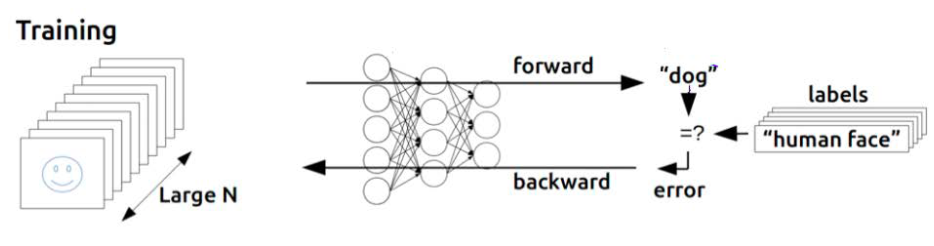

### Backpropagation
* Chain Rule
    * $f(g(x))$, $f(g)$, $g(x)$에 대해 미분
        * $\displaystyle \frac{\partial f}{\partial x} = \frac{\partial f}{\partial g}\frac{\partial g}{\partial x}$
![](https://user-images.githubusercontent.com/661959/54297147-9924a680-45f9-11e9-9cab-9930330a8f19.png)    
    

#### XOR 문제 MLP 학습 예제
* 앞서 상수로 풀었던 XOR 문제를 학습해서 해결

In [ ]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val)

    w1, b_1, w2, b_2,h, p, a = sess.run(
        [W1, b1, W2, b2,hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"Hypothesis:{h} \nPredicted:{p} \nAccuracy:{a}")
    print(f"w1:{w1}, b1:{b_1}, w2:{w2}, b2{b_2}")


### Vanishing Gradient
![](https://t1.daumcdn.net/cfile/tistory/997E1B4C5BB6EAF239)
* sigmoid 함수를 사용하면 input값들이(x1,x2,x3....xn) layer을 거치면서 0에 수렴
* 0에 수렴하는 값들이 다른 layer의 input 값으로 입력된다.
* 입력된 값들은 layer를 거치면서 0에 수렴
* x1,x2,x3....xn의 값은 최종으로 출력 되는 값에 영향이 없다
* cost가 줄어들지 않는다.

In [1]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([5, 5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([5, 5]), name='weight4')
b4 = tf.Variable(tf.random_normal([5]), name='bias4')
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_normal([5, 5]), name='weight5')
b5 = tf.Variable(tf.random_normal([5]), name='bias5')
layer5 = tf.sigmoid(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_normal([5, 5]), name='weight6')
b6 = tf.Variable(tf.random_normal([5]), name='bias6')
layer6 = tf.sigmoid(tf.matmul(layer5, W6) + b6)

W7 = tf.Variable(tf.random_normal([5, 5]), name='weight7')
b7 = tf.Variable(tf.random_normal([5]), name='bias7')
layer7 = tf.sigmoid(tf.matmul(layer6, W7) + b7)

W8 = tf.Variable(tf.random_normal([5, 5]), name='weight8')
b8 = tf.Variable(tf.random_normal([5]), name='bias8')
layer8 = tf.sigmoid(tf.matmul(layer7, W8) + b8)

W9 = tf.Variable(tf.random_normal([5, 5]), name='weight9')
b9 = tf.Variable(tf.random_normal([5]), name='bias9')
layer9 = tf.sigmoid(tf.matmul(layer8, W9) + b9)

W10 = tf.Variable(tf.random_normal([5, 1]), name='weight10')
b10 = tf.Variable(tf.random_normal([1]), name='bias10')
hypothesis = tf.sigmoid(tf.matmul(layer9, W10) + b10)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val)

    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"Hypothesis:{h} \nPredicted:{p} \nAccuracy:{a}")


Instructions for updating:
Colocations handled automatically by placer.
0 0.6935633
500 0.6931445
1000 0.6931445
1500 0.6931445
2000 0.69314444
2500 0.69314444
3000 0.6931444
3500 0.69314444
4000 0.6931444
4500 0.6931443
5000 0.6931443
5500 0.69314444
6000 0.6931443
6500 0.6931444
7000 0.6931443
7500 0.6931443
8000 0.6931443
8500 0.69314426
9000 0.6931443
9500 0.69314426
10000 0.6931442
Hypothesis:[[0.49997246]
 [0.500004  ]
 [0.4999949 ]
 [0.50002056]] 
Predicted:[[0.]
 [1.]
 [0.]
 [1.]] 
Accuracy:0.5


### ReLU Activation Function 
* Rectified Linear Unit
* `max(0,x)` 

### Activation Function
* 역 전파 알고리즘에 적합한 활성화 함수
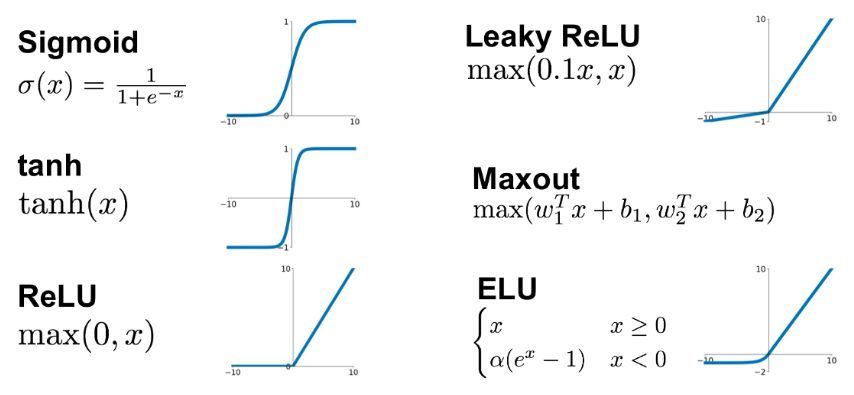

In [ ]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 5], seed=1), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([5, 5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([5, 5]), name='weight4')
b4 = tf.Variable(tf.random_normal([5]), name='bias4')
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_normal([5, 5]), name='weight5')
b5 = tf.Variable(tf.random_normal([5]), name='bias5')
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_normal([5, 5]), name='weight6')
b6 = tf.Variable(tf.random_normal([5]), name='bias6')
layer6 = tf.nn.relu(tf.matmul(layer5, W6) + b6)

W7 = tf.Variable(tf.random_normal([5, 5]), name='weight7')
b7 = tf.Variable(tf.random_normal([5]), name='bias7')
layer7 = tf.nn.relu(tf.matmul(layer6, W7) + b7)

W8 = tf.Variable(tf.random_normal([5, 5]), name='weight8')
b8 = tf.Variable(tf.random_normal([5]), name='bias8')
layer8 = tf.nn.relu(tf.matmul(layer7, W8) + b8)

W9 = tf.Variable(tf.random_normal([5, 5]), name='weight9')
b9 = tf.Variable(tf.random_normal([5]), name='bias9')
layer9 = tf.nn.relu(tf.matmul(layer8, W9) + b9)

W10 = tf.Variable(tf.random_normal([5, 1]), name='weight10')
b10 = tf.Variable(tf.random_normal([1]), name='bias10')
hypothesis = tf.sigmoid(tf.matmul(layer9, W10) + b10)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(W1))

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val)

    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"Hypothesis:{h} \nPredicted:{p} \nAccuracy:{a}")


### Weight 초기 값
* Geffrey E. Hinton (2006) " A Fast Learning Algorithm for Deep Belief Nets"
    * http://www.cs.toronto.edu/~fritz/absps/ncfast.pdf
    * 0을 사용하지 말것
    * RBM(Restricted Boltzmann Machine) 으로 초기화
        * 입력 값을 타겟으로 하는 W와 출력을 찾는 사전 훈련
        * $  X \times W = H $
        * H와 W를 랜덤하게 초기화 해서 X와의 차이를 계산
        * 입력된 X와 차이가 최소가 되는 W로 초기화
    * 초창기에 사용
* Xavier 초기화
    * Xavier Glorot and Yoshua Bengio (2010)
        * http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
    * 입력 값 갯수와 출력 값 갯수 사이의 난수를 입력 값 갯수의 제곱근으로 나눈다.
    * `W = np.random.randn(in, out)/np.sqrt(in)`
    * Tensorflow Initializer
        * ```initializer= tf.glorot_uniform_initializer()
             #tf.initializers.glorot_uniform()
             W = tf.Variable(itntializer(shape=[5,5]))
        ```
        * ```W = tf.get_variable('W1', shape=[5,5], initializer= tf.glorot_uniform_initializer())```
* He 초기화
    * Kaiming He (2015)
        * https://arxiv.org/abs/1502.01852
    * `W = np.random.randn(in, out)/np.sqrt(in/2)`
    * 입력 값을 2로 나눈 제곱근, 분모가 작아지기 때문에 xavier 보다 넓은 범위의 난수 
    * Tensorflow Initializer
        * ```tf.initializers.he_normal()```
    
![](https://t1.daumcdn.net/cfile/tistory/2379CF4E57A0077534)



In [ ]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])


#initializer= tf.glorot_uniform_initializer(seed=1)
initializer= tf.initializers.he_normal()

W1 = tf.Variable(initializer(shape=[2,5]),name='weight1')
b1 = tf.Variable(tf.zeros([5]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(initializer([5, 5]), name='weight2')
#W2 = tf.get_variable('W2', shape=[5,5], initializer= tf.glorot_uniform_initializer())
b2 = tf.Variable(tf.zeros([5]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(initializer([5, 5]), name='weight3')
#W3 = tf.get_variable('W3', shape=[5,5], initializer= tf.glorot_uniform_initializer())
b3 = tf.Variable(tf.zeros([5]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(initializer([5, 5]), name='weight4')
#W4 = tf.get_variable('W4', shape=[5,5], initializer= tf.glorot_uniform_initializer())
b4 = tf.Variable(tf.zeros([5]), name='bias4')
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(initializer([5, 5]), name='weight5')
#W5 = tf.get_variable('W5', shape=[5,5], initializer= tf.glorot_uniform_initializer())
b5 = tf.Variable(tf.zeros([5]), name='bias5')
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(initializer([5, 5]), name='weight6')
#W6 = tf.get_variable('W6', shape=[5,5], initializer= tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.zeros([5]), name='bias6')
layer6 = tf.nn.relu(tf.matmul(layer5, W6) + b6)

W7 = tf.Variable(initializer([5, 5]), name='weight7')
#W7 = tf.get_variable('W7', shape=[5,5], initializer= tf.glorot_uniform_initializer())
b7 = tf.Variable(tf.zeros([5]), name='bias7')
layer7 = tf.nn.relu(tf.matmul(layer6, W7) + b7)

W8 = tf.Variable(initializer([5, 5]), name='weight8')
#W8 = tf.get_variable('W8', shape=[5,5], initializer= tf.glorot_uniform_initializer())
b8 = tf.Variable(tf.zeros([5]), name='bias8')
layer8 = tf.nn.relu(tf.matmul(layer7, W8) + b8)

W9 = tf.Variable(initializer([5, 5]), name='weight9')
#W9 = tf.get_variable('W9', shape=[5,5], initializer= tf.contrib.layers.xavier_initializer())
b9 = tf.Variable(tf.zeros([5]), name='bias9')
layer9 = tf.nn.relu(tf.matmul(layer8, W9) + b9)

W10 = tf.Variable(initializer([5, 1]), name='weight10')
#W10 = tf.get_variable('W10', shape=[5,1], initializer= tf.glorot_uniform_initializer())
b10 = tf.Variable(tf.zeros([1]), name='bias10')
hypothesis = tf.sigmoid(tf.matmul(layer9, W10) + b10)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(W1))

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val)

    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"Hypothesis:{h} \nPredicted:{p} \nAccuracy:{a}")


### Optimizer
* Tensorflow Optimizers
    * tf.train.GradientDescentOptimizer
    * tf.train.MomentumOptimizer
    * tf.train.AdagradOptimizer
    * tf.train.RMSPropOptimizer
    * tf.train.AdamOptimizer

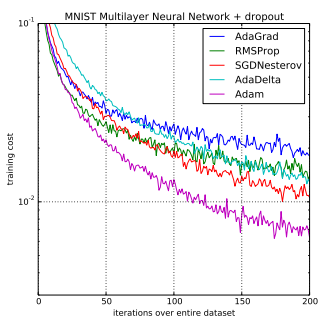    
* Animation : http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html



### Deep Nueral Net 을 이용한 붗꽃 분류
* Dataset 출처 : https://www.openml.org/d/61
* CSV 파일 읽기 : pandas.read_csv()

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

csv = pd.read_csv('./data/dataset_61_iris.csv')
csv.iloc[::10]

#### 붗꽃 데이타 선행 처리
* Category to Number :```class, index = np.unique(y, return_inverse=True)```

In [ ]:
y = np.array(csv.loc[:, 'class'])
x = np.array(csv.loc[:, ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']])

label, y = np.unique(y, return_inverse=True)
label, y

#### 붗꽃 데이타 선행처리2
* 뒤섞기 : ```np.random.shuffle()```

In [ ]:
r = np.arange(y.shape[0])
np.random.shuffle(r)
y = y[r]
x = x[r]
y, x

#### 붗꽃 분류 학습
* 입력 : 4
* 1층 : 300
* 2층 : 100
* 출력 : 3

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

csv = pd.read_csv('./data/dataset_61_iris.csv')

y = np.array(csv.loc[:, 'class'])
x = np.array(csv.loc[:, ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']])

label, y = np.unique(y, return_inverse=True)
r = np.arange(y.shape[0])
np.random.shuffle(r)
y = y[r]
x = x[r]

X_train, X_test = x[:120], x[120:]
y_train, y_test = y[:120], y[120:]

n_input = 4
n_L1 = 300
n_L2 = 100
n_output = 3

y_train = np.eye(n_output)[y_train]
y_test = np.eye(n_output)[y_test]

y_train, y_test

X = tf.placeholder(tf.float32, shape=[None, n_input], name="X")
y = tf.placeholder(tf.float32, shape=[None, n_output])

initializer = tf.initializers.glorot_uniform() #xavier
#initializer= tf.initializers.he_normal()

W1 = tf.Variable(initializer([n_input, n_L1]), name="W1")
b1 = tf.Variable(tf.zeros([n_L1]), name="b1")
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(initializer([n_L1, n_L2]), name="W2")
b2 = tf.Variable(tf.zeros([n_L2]), name="b2")
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(initializer([n_L2, n_output]), name="W3")
b3 = tf.Variable(tf.zeros([n_output]), name="b3")
model = tf.nn.softmax(tf.matmul(L2, W3) + b3)

learning_rate = 0.001
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=model))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cost)

is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(y, axis=1))
acc_train = tf.reduce_mean(tf.cast(is_correct, tf.float32))
acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))

n_epochs = 30
batch_size = 20

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    step = 0
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            (X_batch, y_batch) = (X_train[i:i+ batch_size], y_train[i: i+batch_size])
            _, cost_ , acc_train_= sess.run([train,cost, acc_train],  feed_dict={X:X_batch, y:y_batch})
        print(f"epoch:{epoch}, cost:{cost_}, train accuracy:{acc_train_}")
        
    acc_test_ = sess.run(acc_test, feed_dict={X:X_test, y:y_test})
    print("Test Accuracy:{}".format(acc_test_))    

### Drop out
* Overfitting 방지 기술
* 학습하는 동안 무작위로 노드를 학습에 제외
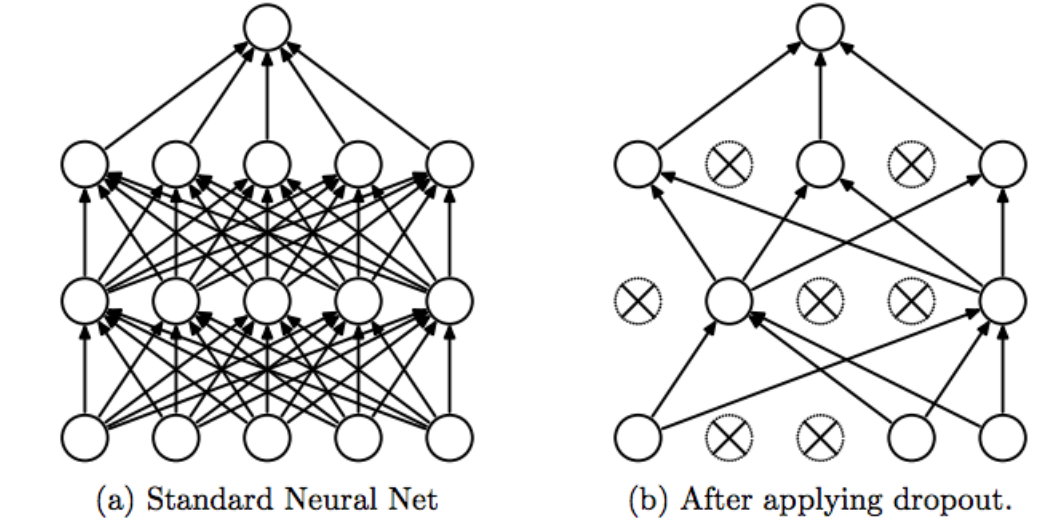
* Tensorflow
    * ```tf.nn.dropout(layer, dropout_rate)```
    * 학습  : dropout_rate = 0.5~0.7
        * ```sess.run(optimizer, feed_dict={dropout_rate:0.7})```
    * 예측 : dropout_rate = 1
        * ```sess.run(optimizer, feed_dict={dropout_rate:1})```
    

#### 붗꽃 분류 Drop out 기법 추가

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

csv = pd.read_csv('./data/dataset_61_iris.csv')

y = np.array(csv.loc[:, 'class'])
x = np.array(csv.loc[:, ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']])

label, y = np.unique(y, return_inverse=True)
r = np.arange(y.shape[0])
np.random.shuffle(r)
y = y[r]
x = x[r]

X_train, X_test = x[:120], x[120:]
y_train, y_test = y[:120], y[120:]

n_input = 4
n_L1 = 300
n_L2 = 100
n_output = 3

y_train = np.eye(n_output)[y_train]
y_test = np.eye(n_output)[y_test]

y_train, y_test

X = tf.placeholder(tf.float32, shape=[None, n_input], name="X")
y = tf.placeholder(tf.float32, shape=[None, n_output])

initializer = tf.initializers.glorot_uniform() #xavier
#initializer= tf.initializers.he_normal()

W1 = tf.Variable(initializer([n_input, n_L1]), name="W1")
b1 = tf.Variable(tf.zeros([n_L1]), name="b1")
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(initializer([n_L1, n_L2]), name="W2")
b2 = tf.Variable(tf.zeros([n_L2]), name="b2")
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

LDropout = tf.nn.dropout(L2, keep_prob=keep_prob)


W3 = tf.Variable(initializer([n_L2, n_output]), name="W3")
b3 = tf.Variable(tf.zeros([n_output]), name="b3")
model = tf.nn.softmax(tf.matmul(LDropout, W3) + b3)

learning_rate = 0.001
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=model))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cost)

is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(y, axis=1))
acc_train = tf.reduce_mean(tf.cast(is_correct, tf.float32))
acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))

n_epochs = 30
batch_size = 20

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    step = 0
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            (X_batch, y_batch) = (X_train[i:i+ batch_size], y_train[i: i+batch_size])
            _, cost_ , acc_train_= sess.run([train,cost, acc_train],  feed_dict={X:X_batch, y:y_batch, keep_prob:0.7})
        print(f"epoch:{epoch}, cost:{cost_}, train accuracy:{acc_train_}")
        
    acc_test_ = sess.run(acc_test, feed_dict={X:X_test, y:y_test, keep_prob:1})
    print("Test Accuracy:{}".format(acc_test_))    

### Tensorflow Low-Level API DNN 실습 : MNIST 손글씨 인식
#### MNIST Dataset 미리보기
* Old Style(Deprecated)
    * ```from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)```
        * Download URL
            * https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
            * https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
            * https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
            * https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz
        * save to "./mnist/data"
        * 70,000개 샘플
            * train(55,000), validation(5,000), test(10,000)
            * images : m x 784 
            * labels : m x 10(one-hot encoding)
* Keras
    * ```from tensorflow import keras
mnist = keras.datasets.mnist.load_data()```
        * Download URL : https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
        * Save to : "~/.keras/datasets/"
        * 70,000개 샘플
            * train(60,000), test(10,000)
            * images : m x 28 x 28
            * label : m x 10(no one-hot encoding)

In [ ]:
%matplotlib inline

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
print(type(mnist))
print(dir(mnist))
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)

print(mnist.train.labels[:5], np.argmax(mnist.train.labels[:5], axis=1))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap="gray")


In [ ]:
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))
(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train_label), (X_test, y_test_label) = keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32).reshape(-1, n_input)/255.0
X_test = X_test.astype(np.float32).reshape(-1, n_input)/255.0
X_valid, X_train = X_train[:5000], X_train[5000:]

y_valid_label, y_train_label = y_train_label[:5000], y_train_label[5000:]
y_train = np.eye(n_output)[y_train_label]
y_valid = np.eye(n_output)[y_valid_label]
y_test = np.eye(n_output)[y_test_label]


X = tf.placeholder(tf.float32, shape=[None, n_input], name="X")
y = tf.placeholder(tf.float32, shape=[None, n_output])

initializer = tf.initializers.glorot_uniform() #xavier
#initializer= tf.initializers.he_normal()

with tf.name_scope('layer-1'):
    W1 = tf.Variable(initializer([n_input, n_L1]), name="W1")
    b1 = tf.Variable(tf.zeros([n_L1]), name="b1")
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

with tf.name_scope('layer-2'):
    W2 = tf.Variable(initializer([n_L1, n_L2]), name="W2")
    b2 = tf.Variable(tf.zeros([n_L2]), name="b2")
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

with tf.name_scope('layer-out'):
    W3 = tf.Variable(initializer([n_L2, n_output]), name="W3")
    b3 = tf.Variable(tf.zeros([n_output]), name="b3")
    model = tf.nn.softmax(tf.matmul(L2, W3) + b3)

with tf.name_scope('optimizer'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=model))
    learning_rate = 0.0001
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(cost)
    cost_summary = tf.summary.scalar('cost', cost)

with tf.name_scope('accuracy'):
    is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(y, axis=1))
    acc_train = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    acc_valid = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    train_acc_summary = tf.summary.scalar('train_Acc', acc_train)
    

    
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./logs3', sess.graph)
    merged = tf.summary.merge([cost_summary, train_acc_summary])
    #merged = tf.summary.merge_all()
    n_epochs = 20
    batch_size = 100
    step = 0
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            (X_batch, y_batch) = (X_train[i:i+ batch_size], y_train[i: i+batch_size])
            _, cost_ , acc_train_= sess.run([train,cost, acc_train],  feed_dict={X:X_batch, y:y_batch})
            #cost_sum, train_acc_sum = sess.run([cost_summary,train_acc_summary], feed_dict={X:X_batch, y:y_batch})
            summary = sess.run(merged, feed_dict={X:X_batch, y:y_batch})
            step = step + 1
            #writer.add_summary(cost_sum, step)
            #writer.add_summary(train_acc_sum, step)
            writer.add_summary(summary, step)
        acc_val_ = sess.run(acc_valid, feed_dict={X:X_valid, y:y_valid})
        print(f"epoch:{epoch}, cost:{cost_}, train accuracy:{acc_train_}, validation accuracy:{acc_val_}")
        
    acc_test_ = sess.run(acc_test, feed_dict={X:X_test, y:y_test})
    print("Test Accuracy:{}".format(acc_test_))
    
    saver.save(sess, './model/mnist_ann.ckpt')
    writer.close()

### Tensorflow DNN 실습 : MNIST 
* Drop out 기법 추가
* layer 생성 함수
    * def neuron(X, n_neuron, name, activation=None)

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow import keras
import numpy as np
import img2data
import cv2
import matplotlib.pyplot as plt

tf.reset_default_graph()

n_input = 28*28
n_L1 = 256
n_L2 = 256
n_output = 10
model_save_path = './model/mnist_ann.ckpt'

(X_train, y_train_label), (X_test, y_test_label) = keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32).reshape(-1, n_input)/255.0
X_test = X_test.astype(np.float32).reshape(-1, n_input)/255.0
X_valid, X_train = X_train[:5000], X_train[5000:]

y_valid_label, y_train_label = y_train_label[:5000], y_train_label[5000:]
y_train = np.eye(n_output)[y_train_label]
y_valid = np.eye(n_output)[y_valid_label]
y_test = np.eye(n_output)[y_test_label]


X = tf.placeholder(tf.float32, shape=[None, n_input], name="X")
y = tf.placeholder(tf.float32, shape=[None, n_output])
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

def neuron(X, n_neuron, name, activation=None, initializer=tf.initializers.glorot_uniform()):
    with tf.name_scope(name):
        n_input = int(X.get_shape()[1])
        W = tf.Variable(initializer([n_input, n_neuron]), name="W")
        b = tf.Variable(tf.zeros([n_neuron]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        

L1 = neuron(X, n_L1, name="layer-1", activation=tf.nn.relu)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
L2 = neuron(L1, n_L2, name="layer-2", activation=tf.nn.relu)

# adding dropout layer
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
model = neuron(L2, n_output, name="layer-out", activation=tf.nn.softmax)
model = tf.identity(model, "model")

'''
with tf.name_scope('layer-1'):
    W1 = tf.Variable(initializer([n_input, n_L1]), name="W1")
    b1 = tf.Variable(tf.zeros([n_L1]), name="b1")
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

with tf.name_scope('layer-2'):
    W2 = tf.Variable(initializer([n_L1, n_L2]), name="W2")
    b2 = tf.Variable(tf.zeros([n_L2]), name="b2")
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

with tf.name_scope('layer-out'):
    W3 = tf.Variable(initializer([n_L2, n_output]), name="W3")
    b3 = tf.Variable(tf.zeros([n_output]), name="b3")
    model = tf.nn.softmax(tf.matmul(L2, W3) + b3)
'''
with tf.name_scope('optimizer'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=model))
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(cost)
    cost_summary = tf.summary.scalar('cost', cost)

with tf.name_scope('accuracy'):
    is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(y, axis=1))
    acc_train = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    acc_valid = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    train_acc_summary = tf.summary.scalar('train_Acc', acc_train)
    

    
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./logs3', sess.graph)
    merged = tf.summary.merge([cost_summary, train_acc_summary])
    #merged = tf.summary.merge_all()
    n_epochs = 30
    batch_size = 100
    step = 0
    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            (X_batch, y_batch) = (X_train[i:i+ batch_size], y_train[i: i+batch_size])
            _, cost_ , acc_train_= sess.run([train,cost, acc_train],  feed_dict={X:X_batch, y:y_batch, keep_prob:0.7})
            #cost_sum, train_acc_sum = sess.run([cost_summary,train_acc_summary], feed_dict={X:X_batch, y:y_batch})
            summary = sess.run(merged, feed_dict={X:X_batch, y:y_batch, keep_prob:1})
            step = step + 1
            #writer.add_summary(cost_sum, step)
            #writer.add_summary(train_acc_sum, step)
            writer.add_summary(summary, step)
        acc_val_ = sess.run(acc_valid, feed_dict={X:X_valid, y:y_valid, keep_prob:1})
        print(f"epoch:{epoch}, cost:{cost_}, train accuracy:{acc_train_}, validation accuracy:{acc_val_}")
        
    acc_test_ = sess.run(acc_test, feed_dict={X:X_test, y:y_test, keep_prob:1})
    print("Test Accuracy:{}".format(acc_test_))
    
    saver.save(sess, model_save_path)
    writer.close()
    
    
    
    image = cv2.imread('./img/0458.png')
    plt.imshow(image)
    plt.show()
    numbers = img2data.img2digits(image, (28,28), border=4)
    for i, n in enumerate(numbers):
        Z = sess.run(model, feed_dict={X:n, keep_prob:1})
        print(Z, np.argmax(Z, axis=1))
        pred = np.argmax(Z, axis=1)
        plt.subplot(1, len(numbers), i+1)
        plt.title(str(pred))
        plt.imshow(n.reshape(28,28), cmap="gray")
    plt.show()


### Tensorflow DNN 실습 : MNIST 모델 복원
* 모델 복원 후 예측 실행

In [ ]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import img2data
import cv2
import matplotlib.pyplot as plt

model_save_path = './model/mnist_ann.ckpt'
img_path = './img/0458.png'
#img_path = './img/1369.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph(model_save_path + '.meta')
    new_saver.restore(sess, './model/mnist_ann.ckpt')
    my_model = sess.graph.get_tensor_by_name("model:0")
    
    X = sess.graph.get_tensor_by_name("X:0")
    print(X)
    keep_prob = sess.graph.get_tensor_by_name("keep_prob:0")
    numbers = img2data.img2digits(image, (28,28), border=4)
    for i, n in enumerate(numbers):
        print(n.shape)
        Z = sess.run(my_model, feed_dict={X:n, keep_prob:1})
        pred = np.argmax(Z, axis=1)
        print(Z, pred)
        plt.subplot(1, len(numbers), i+1)
        plt.title(str(pred))
        plt.imshow(n.reshape(28,28), cmap="gray")


## Keras/Tensorflow High-Level API
* keras == tf.keras
    * Graph와 Layer 구조와 생성을 추상화
* keras.Sequencial
    * Fully-Connected Network
    * Multi-Layer Perceptron
* keras.layers
    * Layer를 추상화
    * keras.layers.Dense
        * 가장 일반적인 완전연결층(밀집층)
    * keras.layers.RNN, LSTM
        * 시계열이나 시퀀스는 3D로 텐서로 표현
    * keras.layers.Conv2D
        * 이미지는 4D로 저장되고 CNN
    * 생성할때 출력층은 필수고 입력 층은 input_shape 인자로 넘기는데, 샘플 축은 생략
        * 예를 들어 `Dense(32, input_shape=(784,))` 이면 입력이 n x 784, 이때 n은 몇개든 상관없슴
        * 만약 `Dense(10)` 이렇게 입력층 생략하면 앞 층의 출력의 갯수로 자동 지정
* Neural Nework 생성 결정 요소
    * 층(Layer) 갯수
    * 입력 / 출력 갯수
    * 손실함수 선택
    * 옵티마이저 선택
    
    

In [ ]:
import tensorflow as tf
import keras 
print(keras.__version__, tf.keras.__version__)
dir(keras.layers)

### 네트워크(network)
* 층을 어떻게 연결할지 결정하는 것
* 나무로 치면 가지들의 모양
* 가장 일반적인 것이 DAG(Directed Acyclic Graph, 비순환 유향 그래프: 일정한 방향이 있고 다시 돌아오는게 없는 그래프)
* 가설공간을 결정하는 작업
    * 아마도 Wx1 + Wx2 + .... Wxn을 얼마나 해야 하는지 결정
* 어떤 모양을 만들어야 하는지 알아 내는건 과학보다 예술에 가깝다.

### 손실함수와 옵티마이저
* 주요 내용
    * 손실함수 : 최소화 해야 할 값. 성공지표
    * 옵티마이저 : 손실함수로 업데이트할 방법 결정, 역전파 알고리즘 구현한것,  SGD
* 손실함수는 각층마다 있지만, 옵티마이저는 네트워크에 단 1개
* 손실함수 잘못 선택하면 생기는 일
    * 평균 인류 행복 지수 최대화 --> 불행한 사람 죽임
* 손실함수 선택  지침
    * 2개 클래스 : binary crossentropy
    * 여러 클래스 분류 : categorical crossentropy
    * 회귀 : 평균제곱오차(MSE)
    * 시퀀스 : CTC(connection Temporal Classification)

### Keras 붗꽃 분류 예제

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd

csv = pd.read_csv('./data/dataset_61_iris.csv')

y = np.array(csv.loc[:, 'class'])
x = np.array(csv.loc[:, ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']])

label, y = np.unique(y, return_inverse=True)
r = np.arange(y.shape[0])
np.random.shuffle(r)
y = y[r]
x = x[r]

X_train, X_test = x[:120], x[120:]
y_train, y_test = y[:120], y[120:]

n_input = 4
n_L1 = 300
n_L2 = 100
n_output = 3

#y_train = np.eye(n_output)[y_train]
#y_test = np.eye(n_output)[y_test]


model = keras.Sequential([
    keras.layers.Dense(n_L1, activation=tf.nn.relu, input_shape=(n_input,)),
    keras.layers.Dense(n_L2, activation=tf.nn.relu),
    keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30,  batch_size=20)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test Accuracy:{}".format(test_acc))

### Keras MNIST 분류 예제

In [ ]:
!pip install h5py pyyaml

In [ ]:
%matplotlib inline

import tensorflow as tf
#from tensorflow import keras
import keras
import numpy as np
import img2data
import cv2
import matplotlib.pyplot as plt


model_save_path ='./models/keras/mnist.h5'
n_input = (28,28)
n_L1 = 256
n_L2 = 256
n_output = 10

n_epochs = 30
batch_size = 100

tf.reset_default_graph()

(X_train, y_train_label), (X_test, y_test_label) = keras.datasets.mnist.load_data()
print(X_train.shape)
#X_train = X_train.astype(np.float32).reshape(-1, n_input)/255.0
#X_test = X_test.astype(np.float32).reshape(-1, n_input)/255.0
X_train = X_train/255.0
X_test = X_test/255.0
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid_label, y_train_label = y_train_label[:5000], y_train_label[5000:]

model = keras.Sequential([
    keras.layers.Flatten(input_shape=n_input),
    keras.layers.Dense(n_L1, activation=tf.nn.relu),
    keras.layers.Dense(n_L2, activation=tf.nn.relu),
    keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train_label, 
          epochs=n_epochs,  batch_size=batch_size,
          validation_data=(X_valid, y_valid_label))
test_loss, test_acc = model.evaluate(X_test, y_test_label)

print("Test Accuracy:{}".format(test_acc))

model.save(model_save_path)

In [ ]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import img2data
import cv2
import matplotlib.pyplot as plt

model_save_path ='./models/keras/mnist.h5'
img_path = './img/0458.png'
#img_path = './img/1369.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()


model = keras.models.load_model(model_save_path)
model.summary()

numbers = img2data.img2digits(image, (28,28), reshape=False, border=4)
numbers = np.array(numbers)
Z = model.predict(numbers)
pred = np.argmax(Z, axis=1)
print(Z, pred)

for i, (n, p) in enumerate(zip(numbers, pred)):
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(p))
    plt.imshow(n.reshape(28,28), cmap="gray")


### Keras 영화리뷰 이진 분류 예제
* IMDB Dataset
    * IMDB : Internet Movie DataBase
    * train 25천개, test : 25천개
    * 각각 긍정 부정 50%씩
    * 리뷰 데이타는 단어를 숫자 시퀀스로 이미 변환
    * 용량 17MB
    * keras.datasets.imdb
        * load_data(num_words=100000) : 빈도 높은 1만 단어만 사용
        * data : 리뷰에 포함된 단어의 인덱스 값들, max:9999
            * 각 샘플은 python list 타입, 길이가 제 각각이라서
        * label : 0-부정, 1-긍정


* 훈련 세트와 검증(validation)셋트로 나눠서 fit()함수 호출 이때 `validation_data` 인자 사용
    * `history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))`
    * 이렇게 하면 `history` 디셔넉리가 'acc', 'loss', 'val_acc', 'val_loss' 4개의 키로 된 결과를 갖는다.
        *  훈련 정확도와 손실, 검증 정확도와 손실 값이다.
    * plot으로 각 에포크당 훈련결과와 검증 결과를 비교할 수 있다.
        * ```
        plt.plot(epochs, loss, 'bo', label='training loss')
        plt.plot(epochs, val_loss, 'b', label='validation loss')
        ```
    * 이걸 보면 어느 에폭에서 과대 적합이 시작되었는지 알 수 있다. 그 에폭과 전체 훈련 셋으로 다시 훈련 시킨다.

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0:3]

In [ ]:
train_labels[0:3]

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0:3]

In [ ]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 신경망 만들기

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

In [ ]:
model.predict(x_test)